# Testing KATS

<img src="https://facebookresearch.github.io/Kats/img/KatsHeroLogo.png" width="50">

Exercising Kats Logic intended to be used for the project.

### Running Simulator
Goal is to be able to create mocked TimeSeries Data

In [1]:
%%capture
!pip install kats

In [2]:
from kats.utils.simulator import Simulator
import matplotlib.pyplot as plt
from kats.models.prophet import ProphetModel, ProphetParams
from kats.detectors.outlier import OutlierDetector
from kats.consts import TimeSeriesData

For the purposes of this tutorial, we are going to run the Simulator to generate a TimeSeriesData object called tsd.

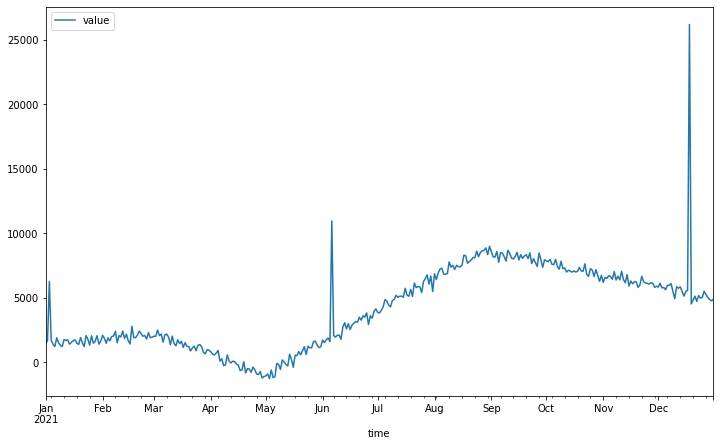

,time,value
0,2021-01-01,1435.738963
1,2021-01-02,1686.125335
2,2021-01-03,6263.511661
3,2021-01-04,1697.356579
4,2021-01-05,1400.816262


In [3]:
sim = Simulator(n=365, start='2021-01-01', freq='D')
tsd = sim.trend_shift_sim(intercept=1500, noise=300, seasonal_period=30, seasonal_magnitude=0.003,
                          cp_arr=[60, 120,240], trend_arr=[10,-50,80,-30])
# Manually add outliers
tsd_df = tsd.to_dataframe()
tsd_df.loc[tsd_df.time == '2021-01-03','value'] *= 4
tsd_df.loc[tsd_df.time == '2021-06-06','value'] *= 6
tsd_df.loc[tsd_df.time == '2021-12-18','value'] *= 5
tsd = TimeSeriesData(tsd_df)

# plot simulated data
tsd.plot(cols=['value'])
plt.show()
tsd.to_dataframe().head()


### Timeseries Forecasting Workflow

In [4]:
params = ProphetParams(seasonality_mode='multiplicative')
m = ProphetModel(tsd, params)
m.fit()

# make prediction for next 10 days
fcst = m.predict(steps=10, freq="D")
print(fcst)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.94731
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       858.949   0.000414061       80.0497   2.137e-06       0.001      125  LS failed, Hessian reset 
      99       861.494     0.0190327       123.988           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       864.744    0.00207693        75.528      0.5793           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       864.969   1.27232e-05       67.3727           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301        864.97   4.12179e-06       79.6749   5.852e-08       0.001      478  LS failed, Hessian reset 
     336        864.97   5.93461e-09       89.5455      0.1297     0.01297      530   
Optimization terminat

### Detecting Outliers

In [5]:
ts_outlierDetection = OutlierDetector(tsd, 'additive')
ts_outlierDetection.detector()
print(ts_outlierDetection.outliers)
tsd_outliers_removed = ts_outlierDetection.remover(interpolate = False) # No interpolation
tsd_outliers_interpolated = ts_outlierDetection.remover(interpolate = True)
tsd_outliers_removed.to_dataframe().head()
# tsd_outliers_interpolated.to_dataframe().head()


[[Timestamp('2021-01-03 00:00:00'), Timestamp('2021-06-05 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2021-12-16 00:00:00'), Timestamp('2021-12-17 00:00:00'), Timestamp('2021-12-18 00:00:00'), Timestamp('2021-12-19 00:00:00'), Timestamp('2021-12-20 00:00:00'), Timestamp('2021-12-21 00:00:00'), Timestamp('2021-12-31 00:00:00')]]


,time,y_0
0,2021-01-01,1435.738963
1,2021-01-02,1686.125335
2,2021-01-03,NaN
3,2021-01-04,1697.356579
4,2021-01-05,1400.816262
